<a href="https://colab.research.google.com/github/sjanapaty/lineageconversion_apma4903/blob/main/apma_12_11_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# run parameters
dy = 0.01
Size = 50  # 10x10 grid
states = 6  # Number of species
Tmax = 10  # Maximum time
run_method = "BDF"  # You can use 'BDF' if the system is stiff
run_rtol = 1e-6
run_atol = 1e-8

# derived run parameters:
dim_x, dim_y = Size, Size
t_span = (0, Tmax)  # Short time span for demonstration; adjust as needed

# chemical Parameters
params = {
    "gZ": 0.1,
    "gA": 0.01,
    "gB": 0.01,
    "gAA": 0.001,
    "dZ": 0.00001,
    "dA": 0.00001,
    "dB": 0.00001,
    "dAA": 0.00001,
    "pZA": 0.2,
    "pZB": 0.05,
    "pAAA": 0.2,
    "uAA": 0.1,
    "uB": 0.1,
    "kAA": 0.1,
    "kB": 0.1,
    "qAA": 0.3,
    "qB": 0.3,
    "DZ": 0.3,  # Diffusion coefficients
    "DA": 0.3,
    "DB": 0.3,
    "DAA": 0.3,
    "DtB": 0.3,
}


# Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Function to compute the Laplacian using convolution
def compute_laplacian(u):
    return convolve2d(u, laplacian_kernel, mode="same", boundary="wrap")

# Reaction-diffusion system
def reaction_diffusion_system(t, y, params):
    # Reshape the 1D array back into (states, dim_x, dim_y)
    concentrations = y.reshape((states, dim_x, dim_y))

    # Compute the Laplacian for each state
    laplacians = np.array([compute_laplacian(concentrations[i]) for i in range(states)])

    # Initialize the derivative array
    dydt = np.zeros_like(concentrations)

    Z, A, AA, B, tAA, tB = concentrations

    # Reaction terms
    dydt[0] = (
        params["gZ"] * 1 - params["dZ"] * 1 - (params["pZA"] + params["pZB"]) * Z
    ) + params["DZ"] * laplacians[0]
    dydt[1] = (
        params["gA"] * 1 - params["dA"] * 1 + params["pZA"] * Z - params["pAAA"] * A
    ) + params["DA"] * laplacians[1]
    dydt[2] = (
        params["gAA"] * 1
        - params["dAA"] * 1
        + params["pAAA"] * A
        + params["uAA"] * tAA / (params["kAA"] + tAA) * B
        - params["uB"] * tB / (params["kB"] + tB) * AA
    ) + params["DAA"] * laplacians[2]
    dydt[3] = (
        params["gB"] * 1
        - params["dB"] * 1
        + params["pZB"] * Z
        + params["uB"] * tB / (params["kB"] + tB) * AA
        - params["uAA"] * tAA / (params["kAA"] + tAA) * B
    ) + params["DB"] * laplacians[3]
    dydt[4] = -params["qAA"] * tAA + params["DAA"] * laplacians[4]
    dydt[5] = -params["qB"] * tB + params["DtB"] * laplacians[5]

    # Flatten the dydt array to 1D for the ODE solver
    return dydt.ravel()

# Initial conditions: small random concentrations to avoid instabilities
y0 = np.random.rand(states * dim_x * dim_y) * dy

# Run the simulation
solution = solve_ivp(
    fun=reaction_diffusion_system,
    t_span=t_span,
    y0=y0,
    args=(params,),
    method=run_method,
    rtol=run_rtol,
    atol=run_atol,
)

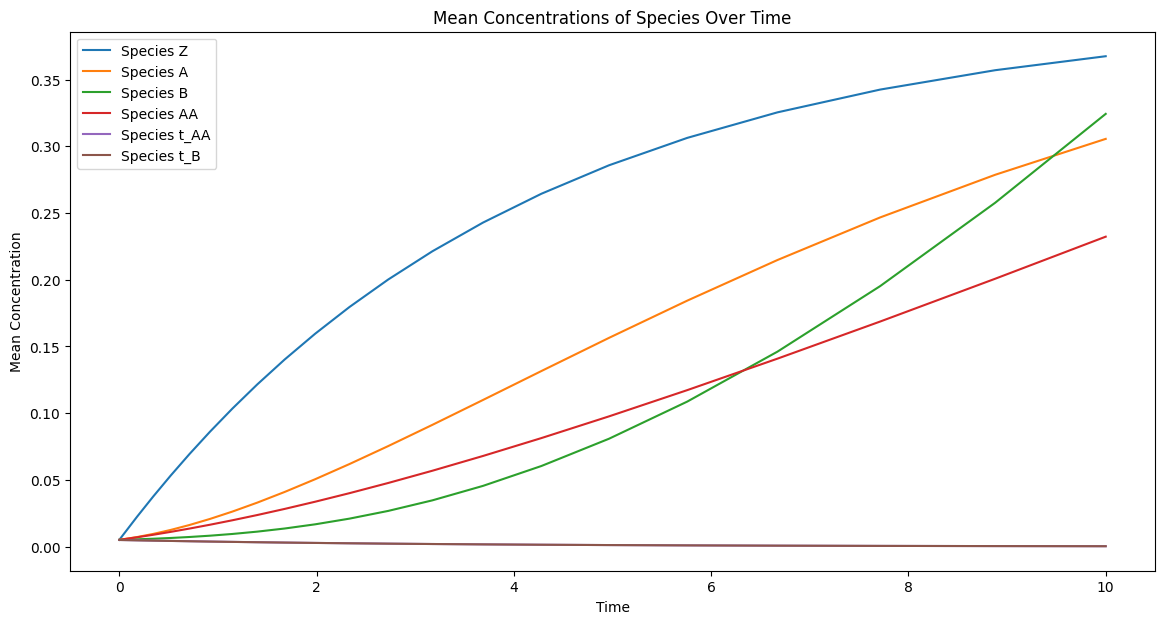

In [2]:
# Reshape the solution to (states, dim_x, dim_y, time_points)
concentration_history = solution.y.reshape((states, dim_x, dim_y, -1))
# Calculate mean concentrations over time for each species
mean_concentrations = np.mean(concentration_history, axis=(1, 2))
# Get the time points from the solution
time_points = solution.t

# The code should now execute the equations including both the reaction terms and the diffusion terms as per the Laplacian computed using `convolve2d`. Each `dydt[i]` line corresponds to one of the equations from your image, with the appropriate parameters and Laplacian terms added.

# Species labels as per the image
species_labels = ["Z", "A", "B", "AA", "t_AA", "t_B"]

# Plot mean concentrations over time with correct labels
plt.figure(figsize=(14, 7))
for i, label in enumerate(species_labels):
    plt.plot(time_points, mean_concentrations[i], label=f"Species {label}")
plt.xlabel("Time")
plt.ylabel("Mean Concentration")
plt.legend()
plt.title("Mean Concentrations of Species Over Time")
plt.show()


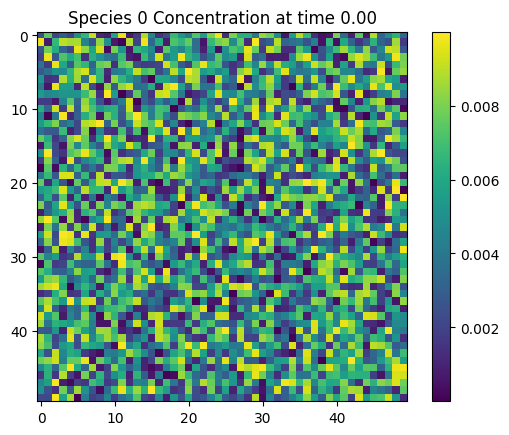

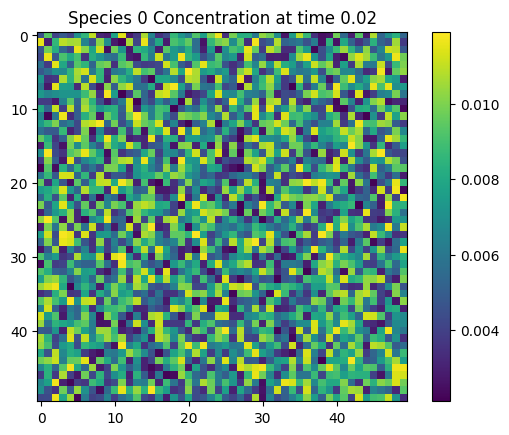

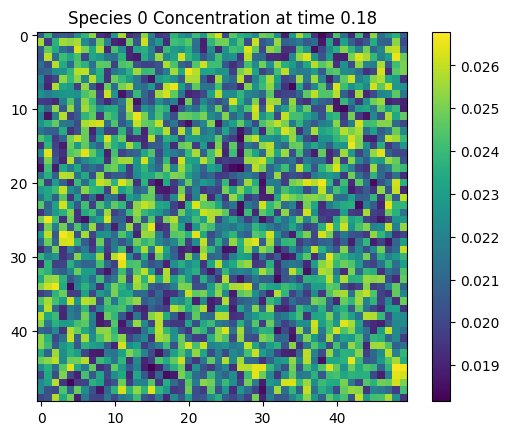

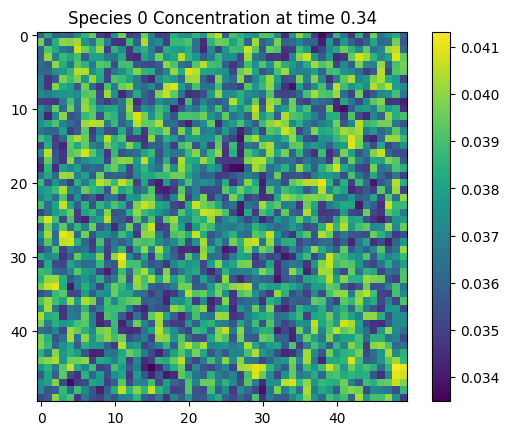

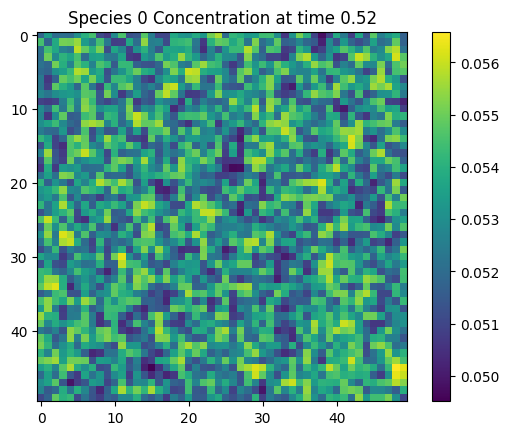

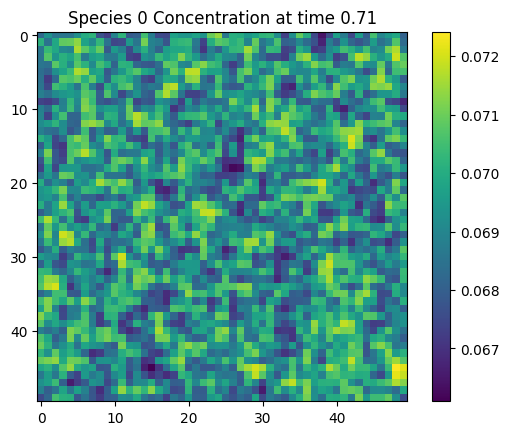

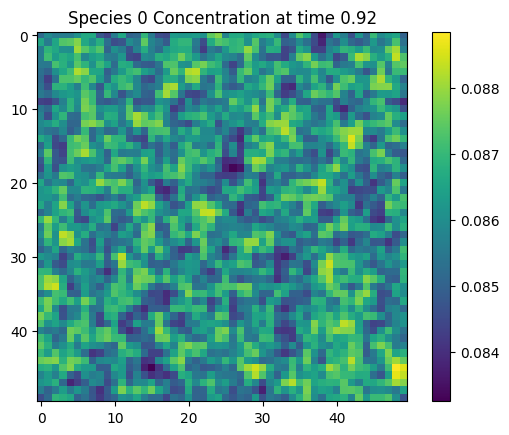

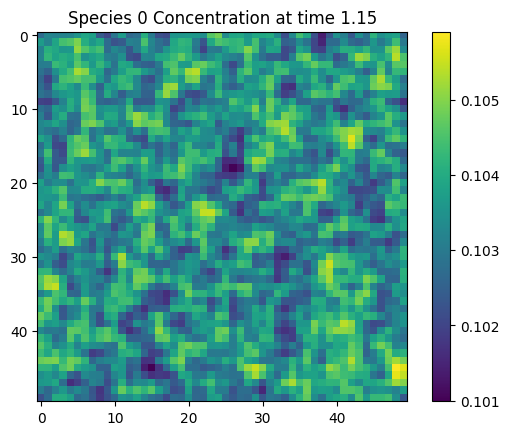

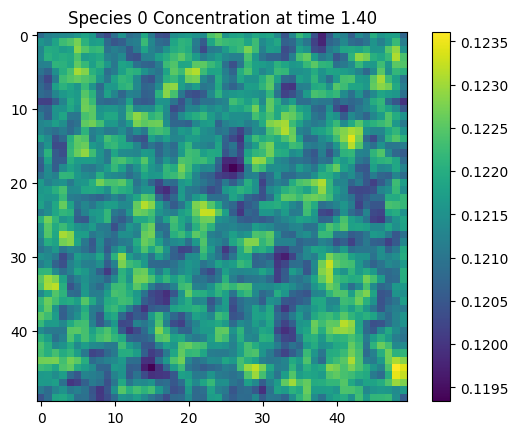

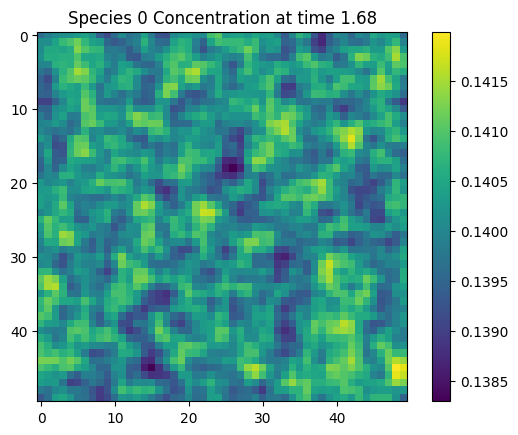

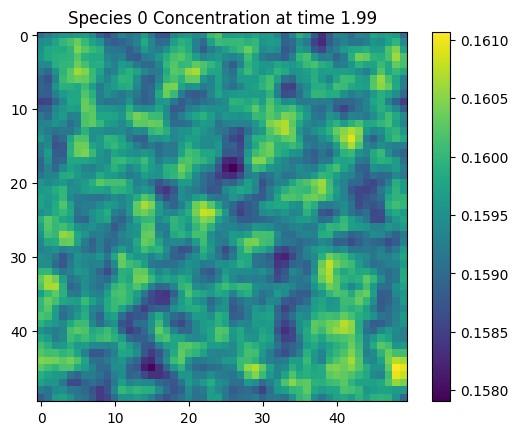

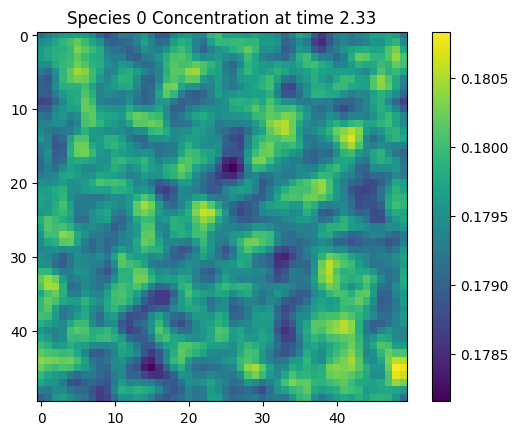

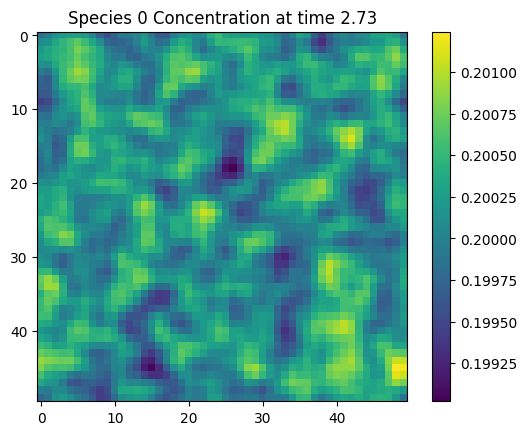

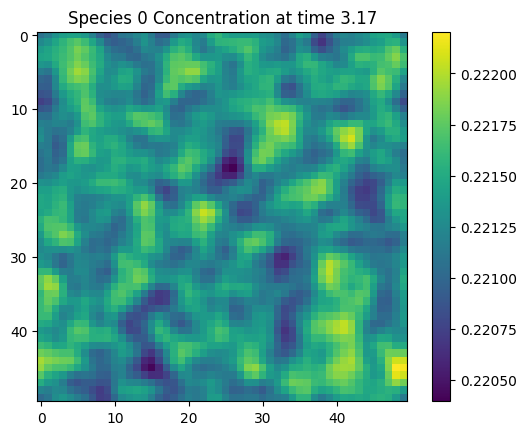

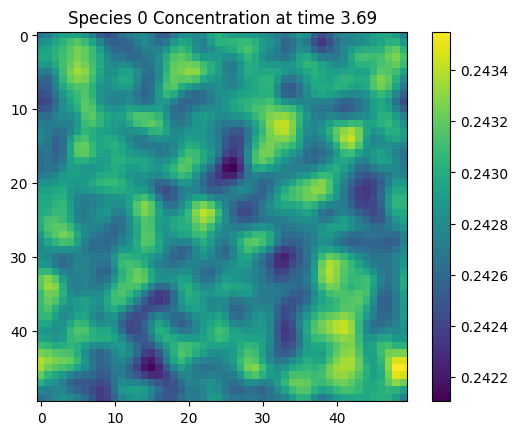

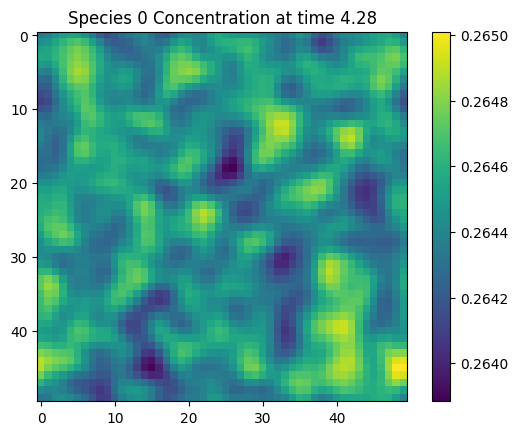

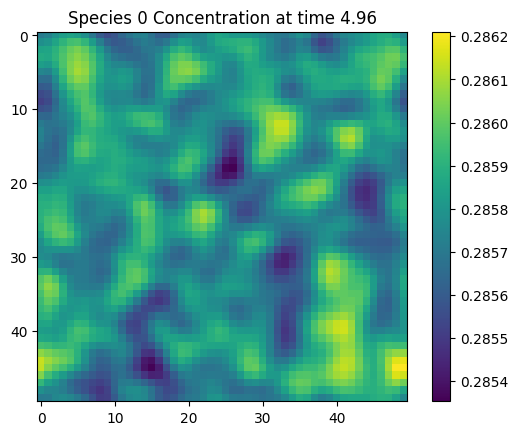

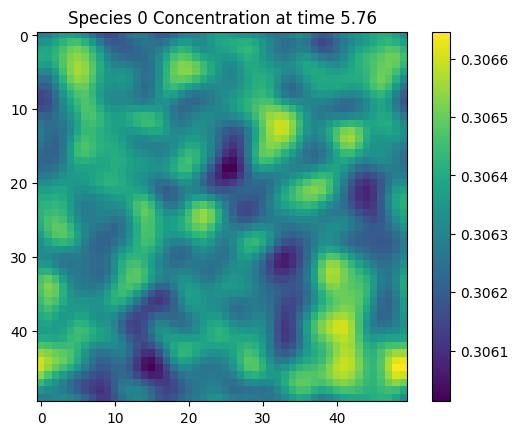

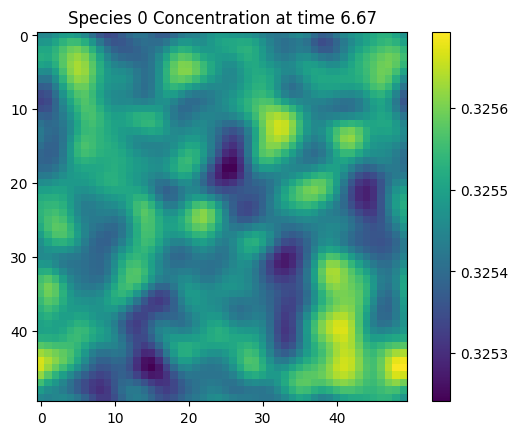

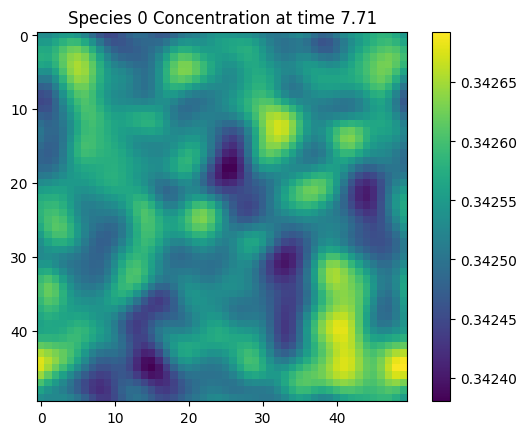

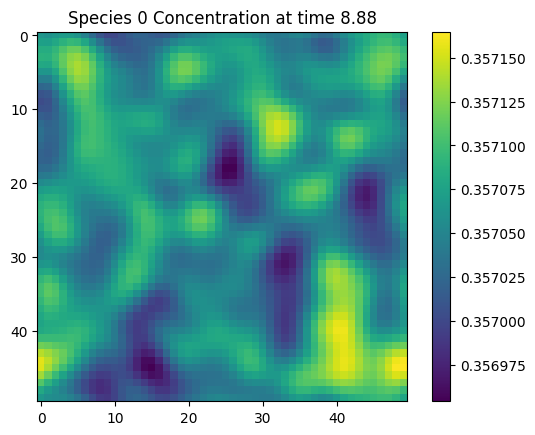

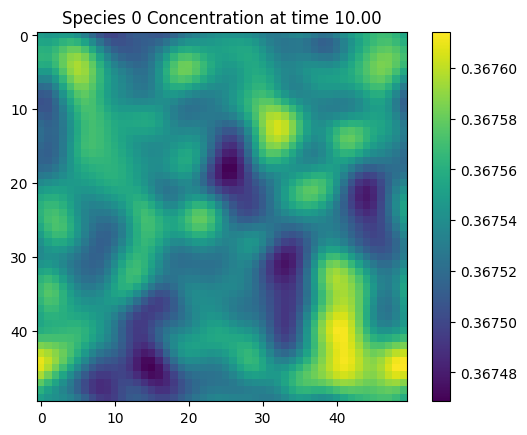

In [8]:
species_index = 0
for t_idx, time_point in enumerate(time_points):
    plt.imshow(concentration_history[species_index, :, :, t_idx], cmap="viridis")
    plt.title(f"Species {species_index} Concentration at time {time_point:.2f}")
    plt.colorbar()
    plt.show()

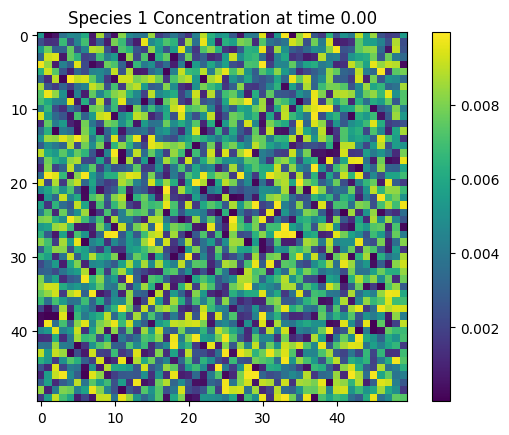

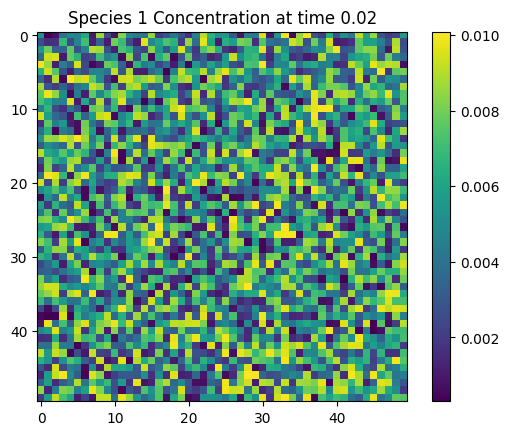

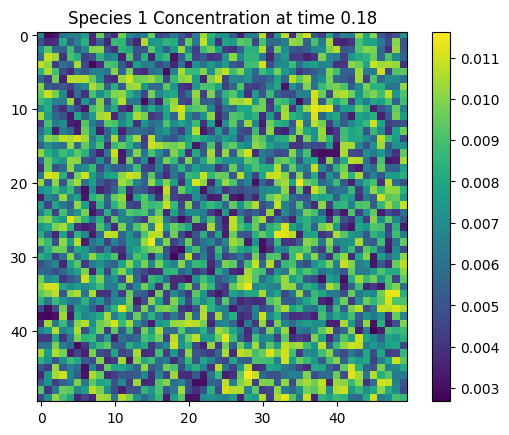

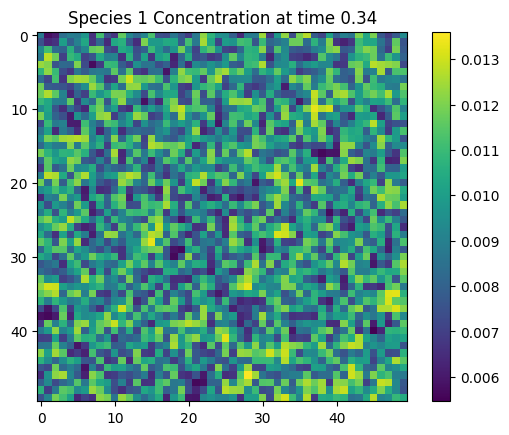

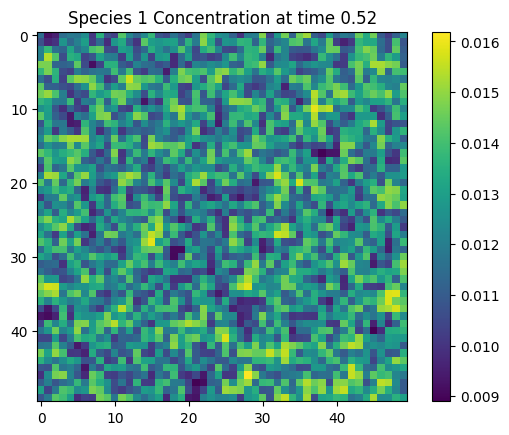

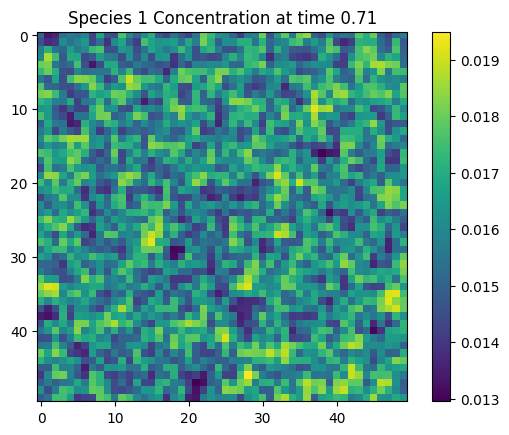

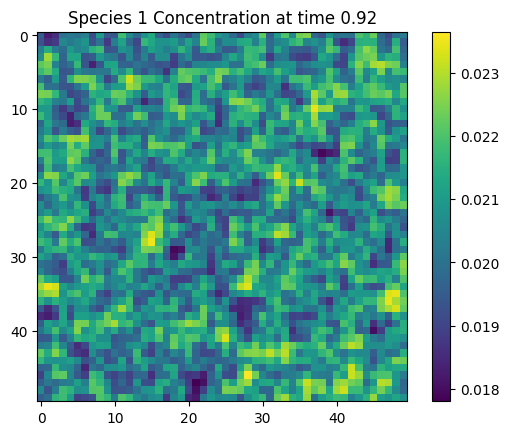

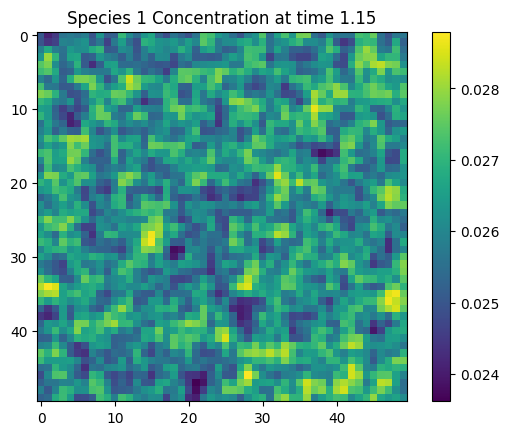

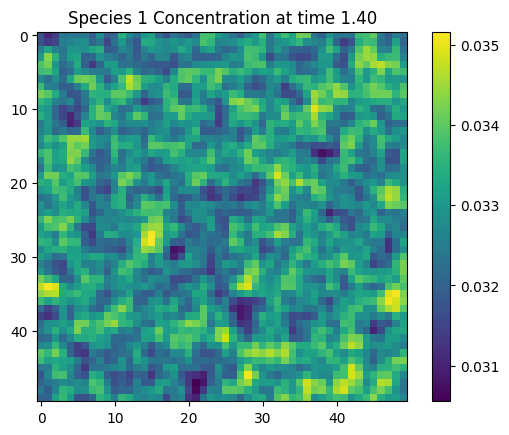

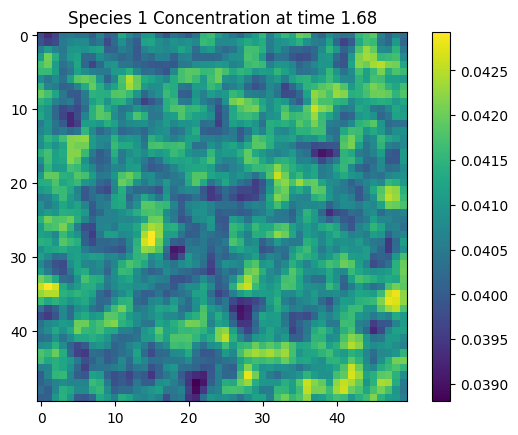

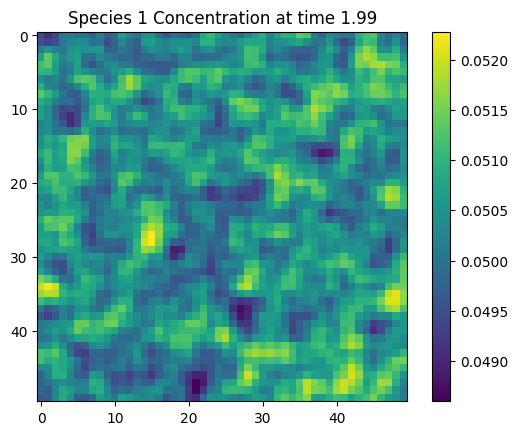

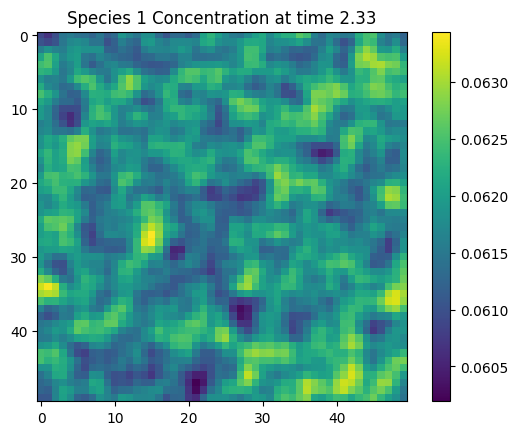

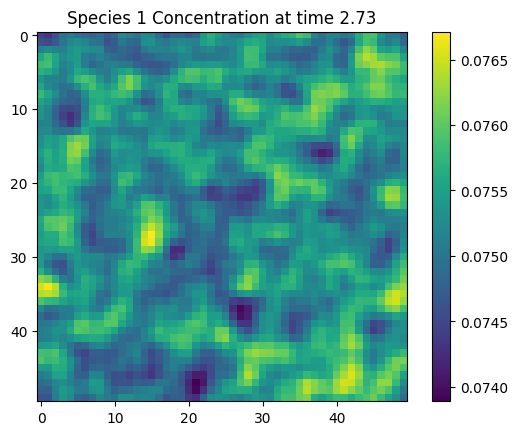

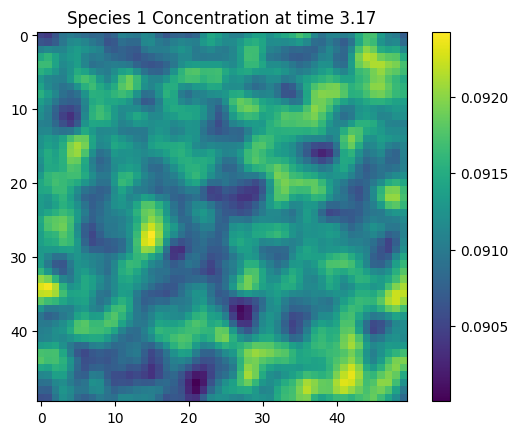

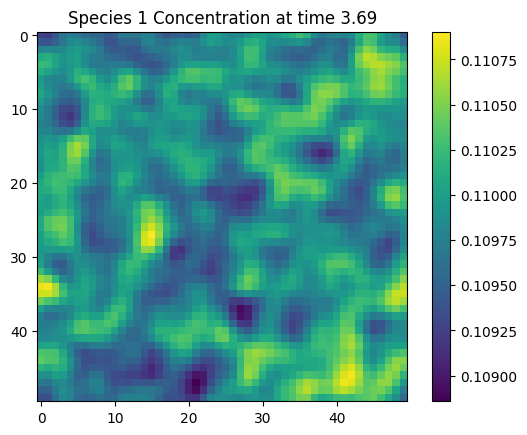

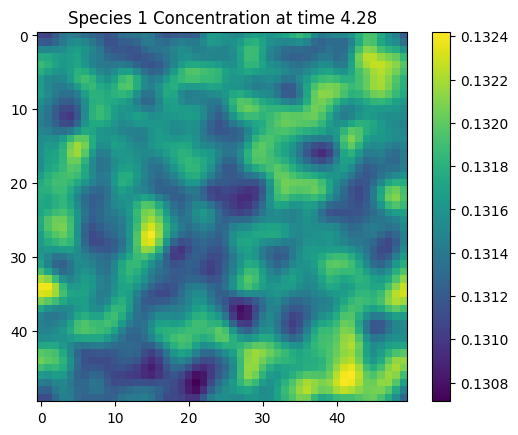

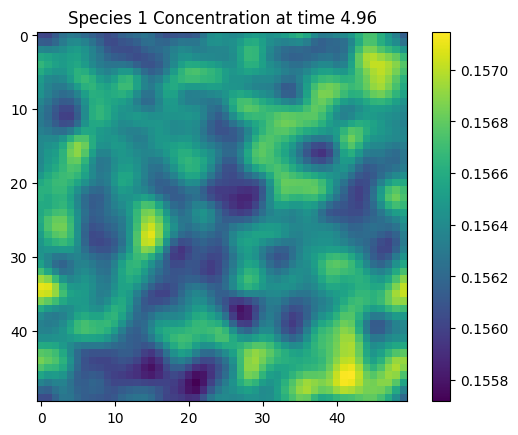

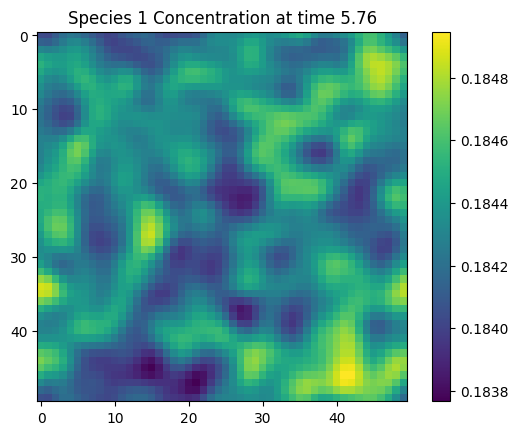

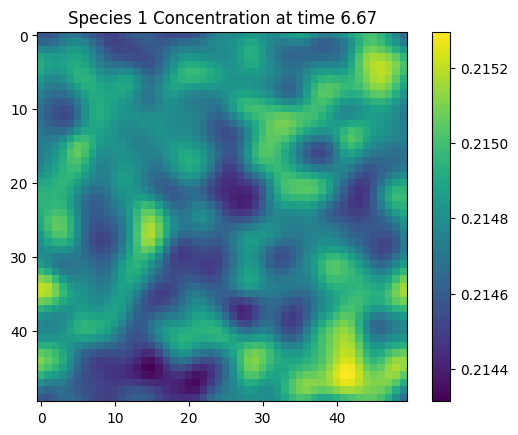

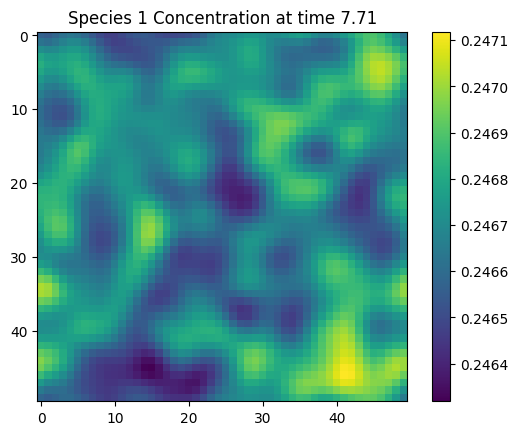

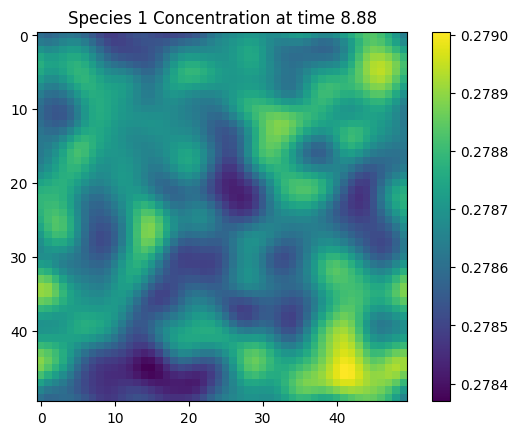

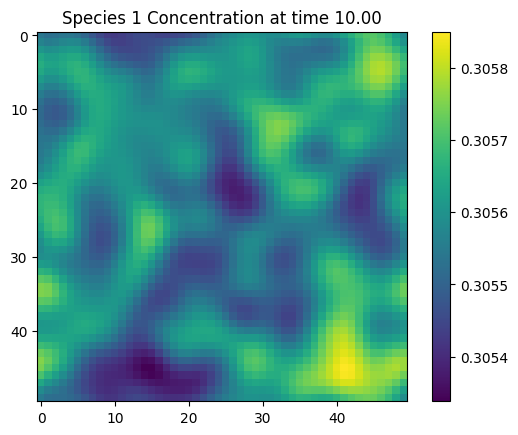

In [5]:
species_index = 1  # Index of the species to plot
for t_idx, time_point in enumerate(time_points):
    plt.imshow(concentration_history[species_index, :, :, t_idx], cmap="viridis")
    plt.title(f"Species {species_index} Concentration at time {time_point:.2f}")
    plt.colorbar()
    plt.show()

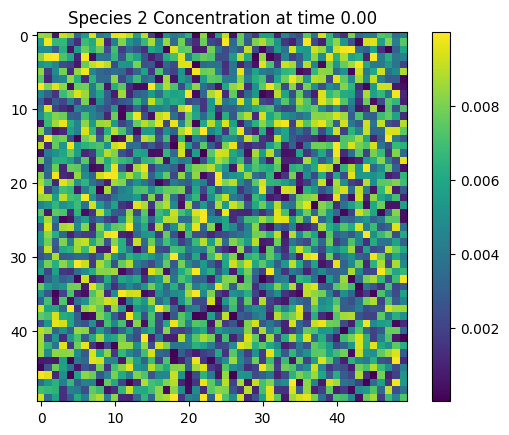

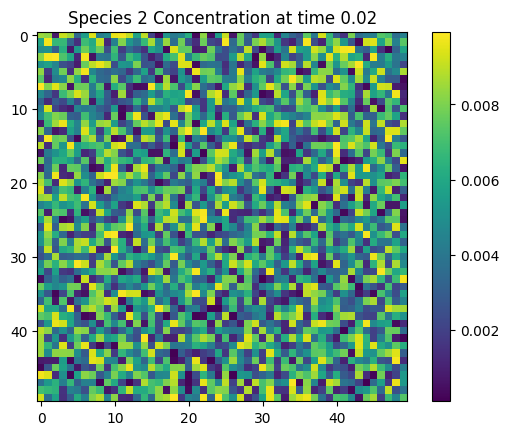

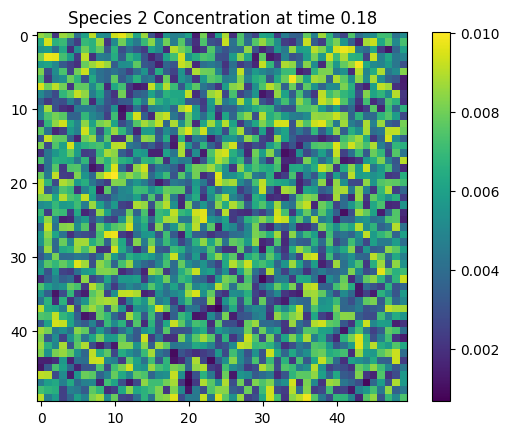

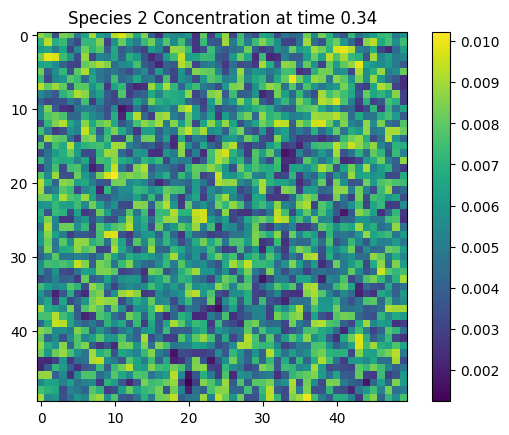

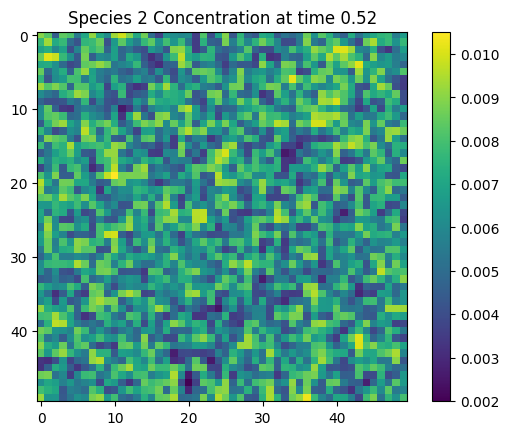

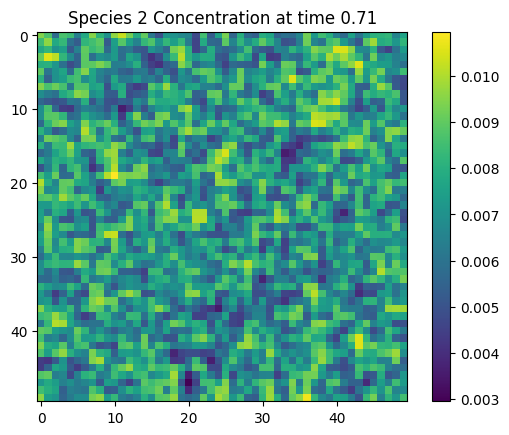

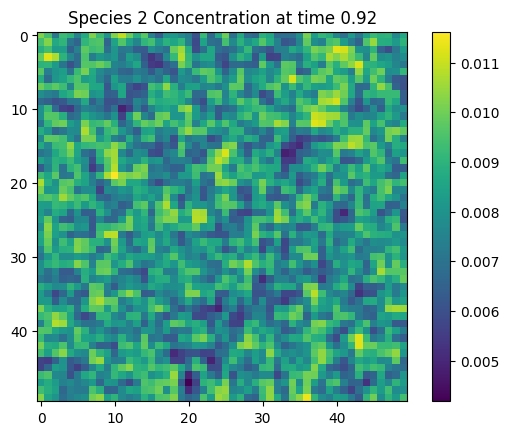

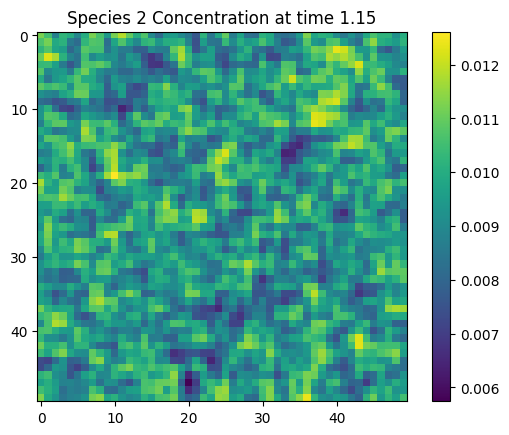

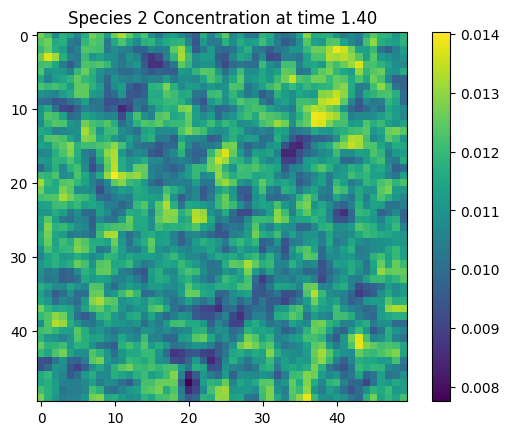

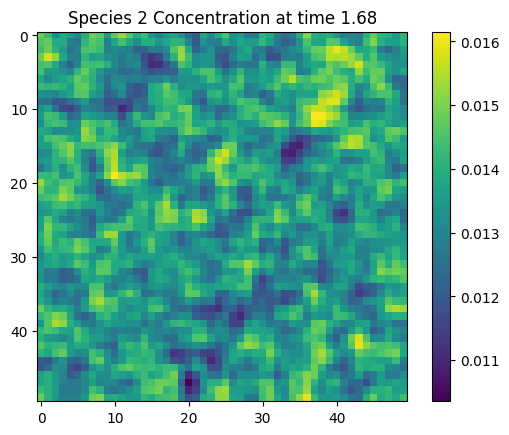

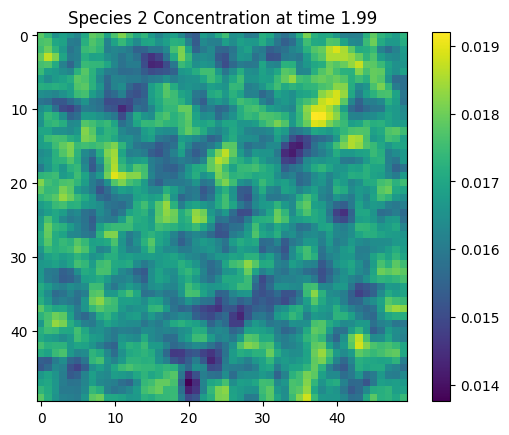

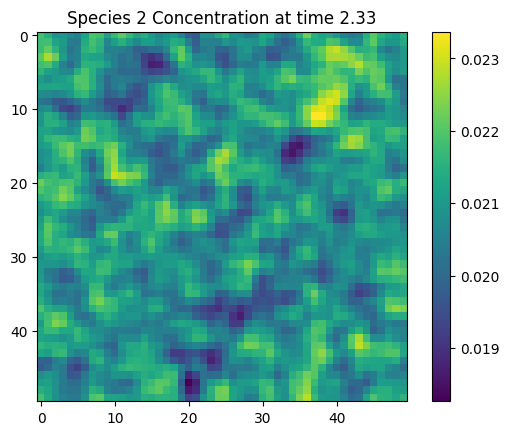

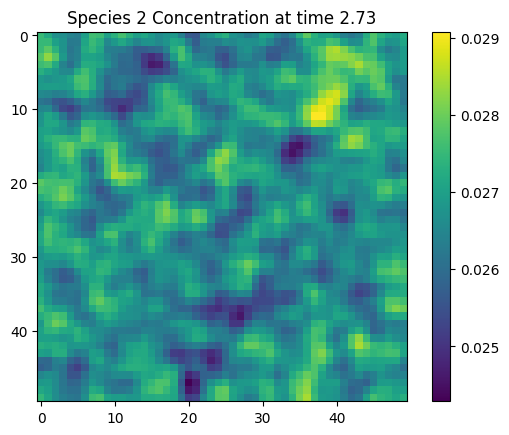

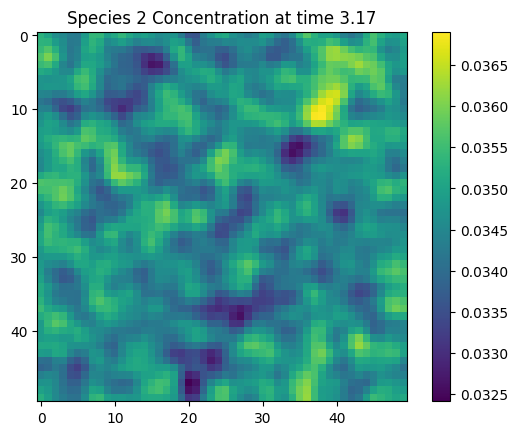

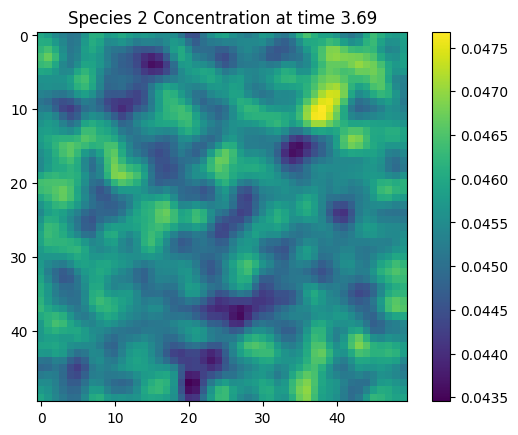

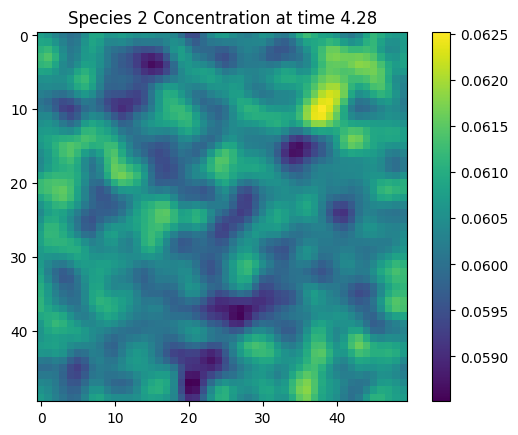

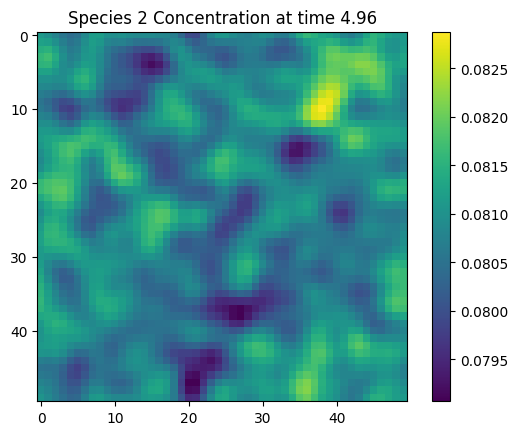

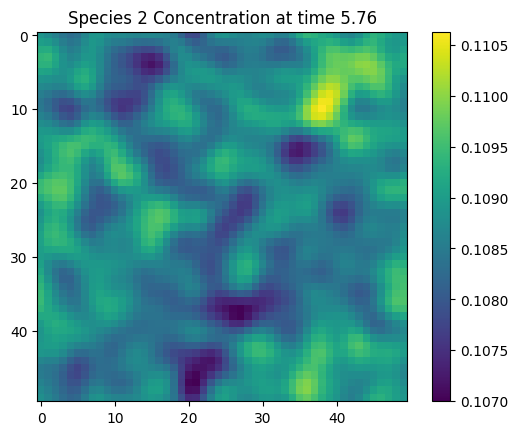

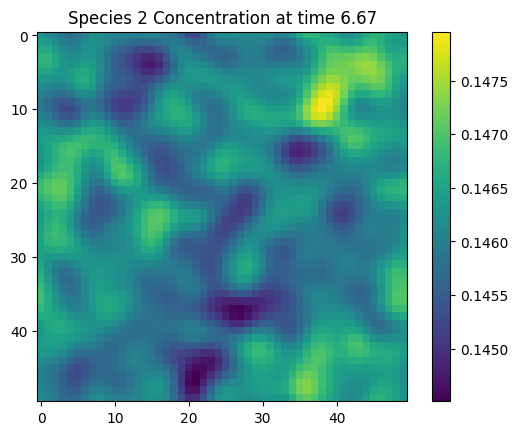

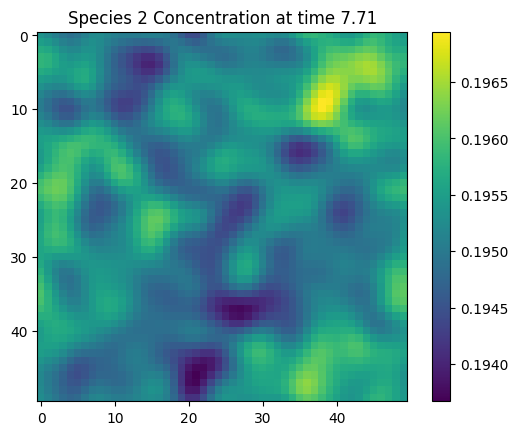

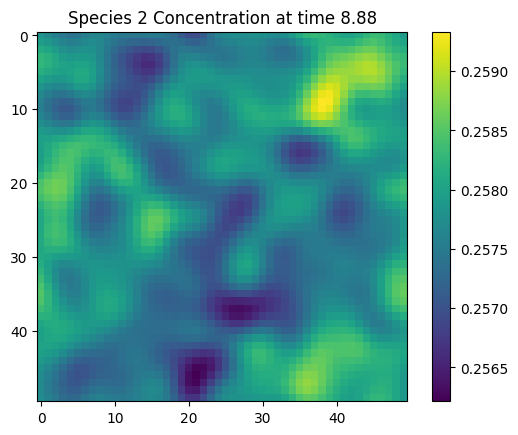

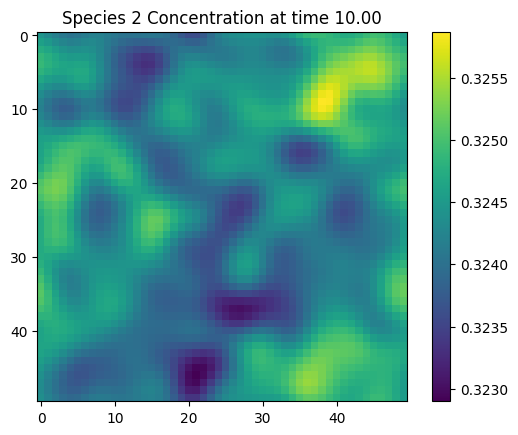

In [6]:
species_index = 2  # Index of the species to plot
for t_idx, time_point in enumerate(time_points):
    plt.imshow(concentration_history[species_index, :, :, t_idx], cmap="viridis")
    plt.title(f"Species {species_index} Concentration at time {time_point:.2f}")
    plt.colorbar()
    plt.show()

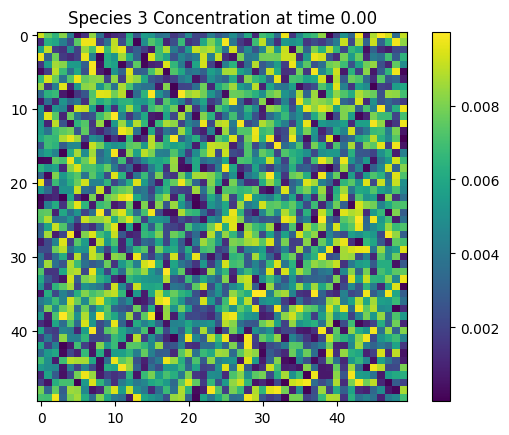

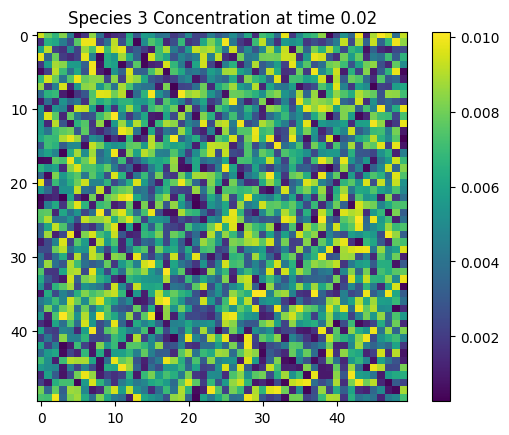

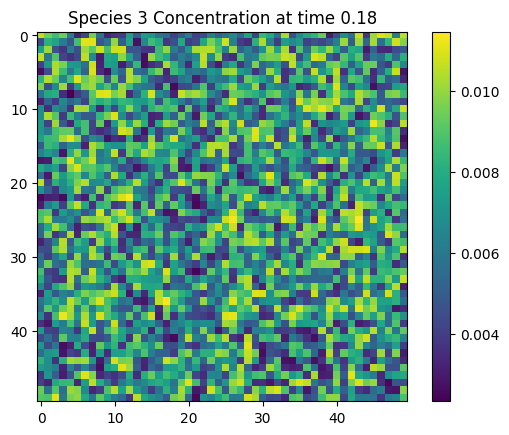

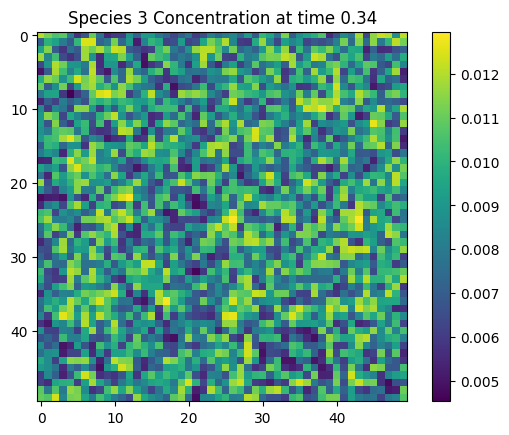

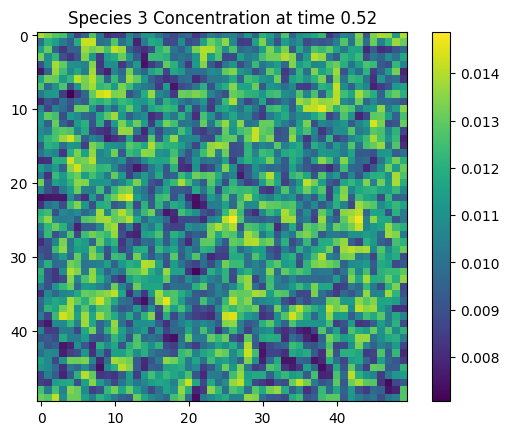

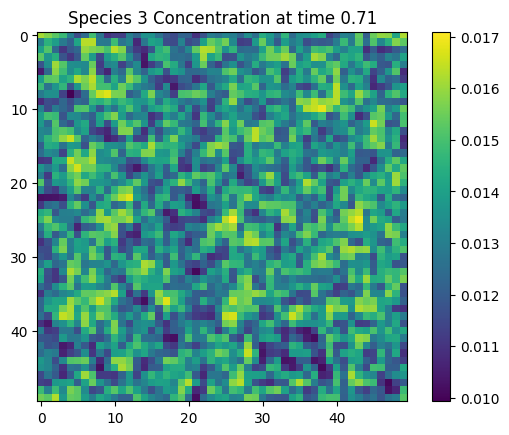

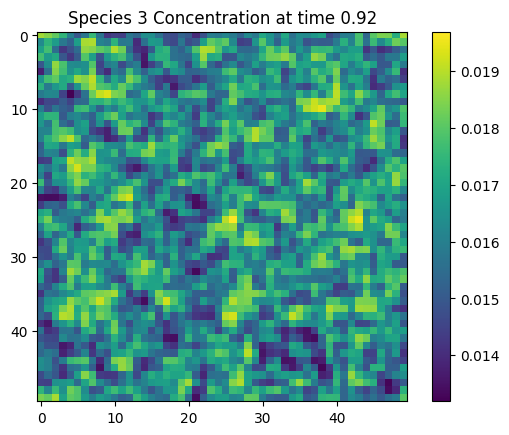

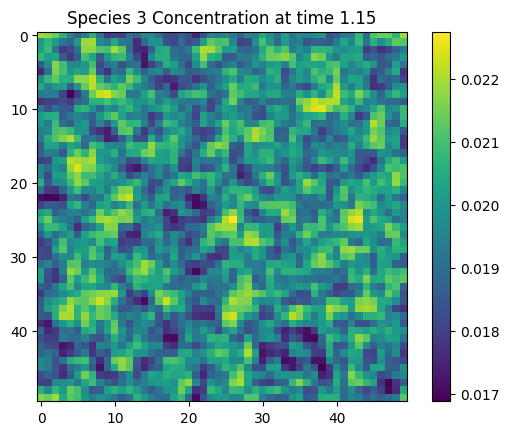

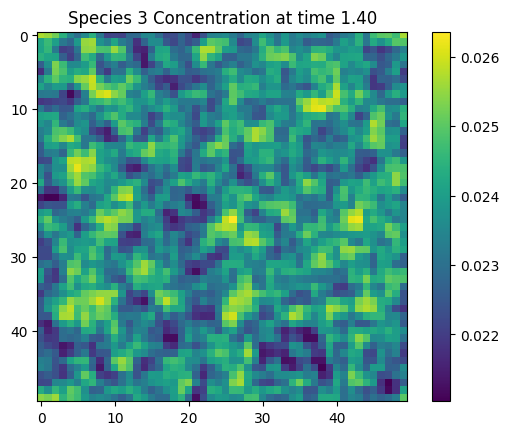

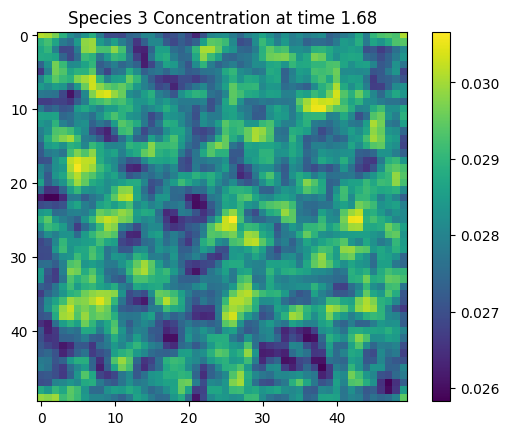

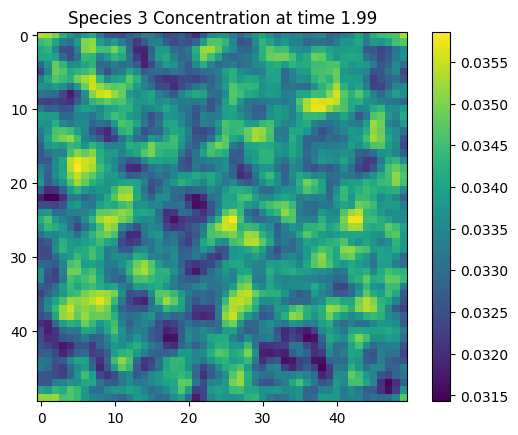

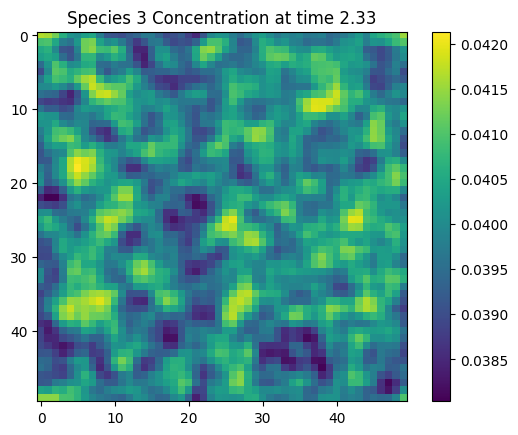

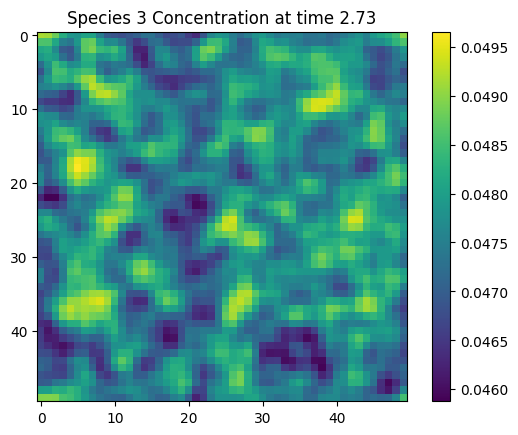

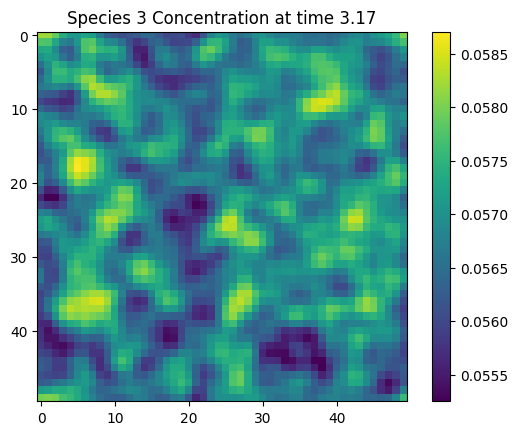

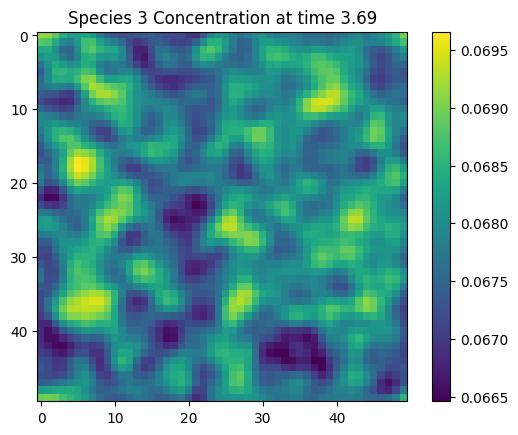

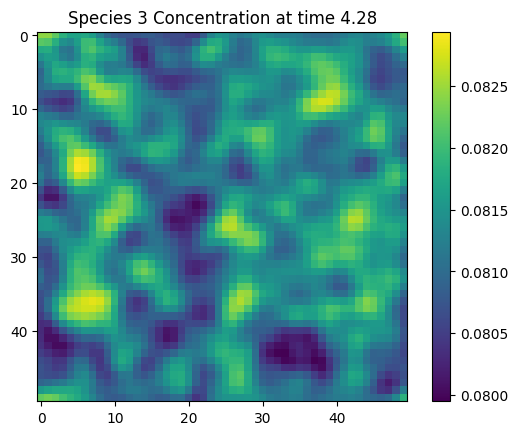

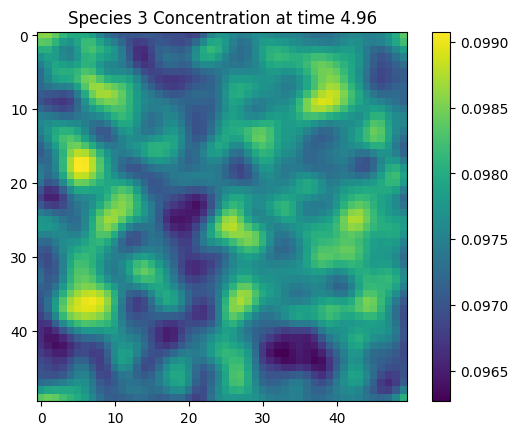

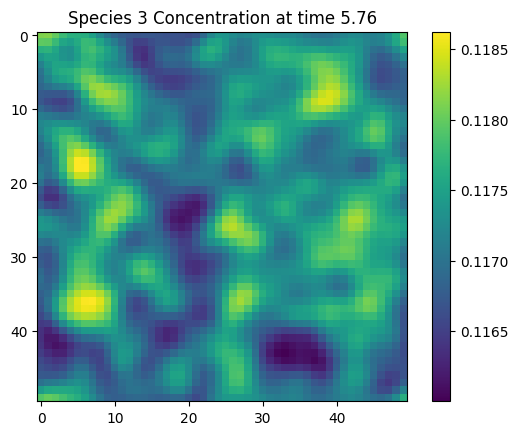

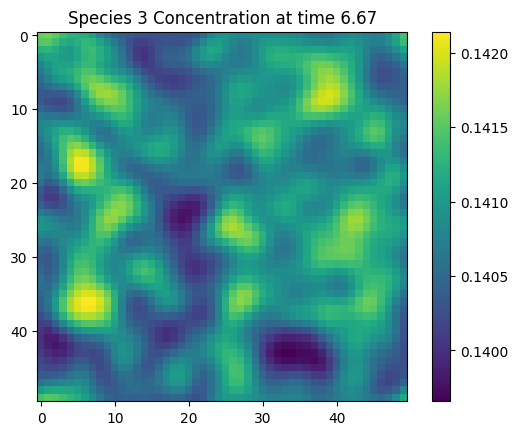

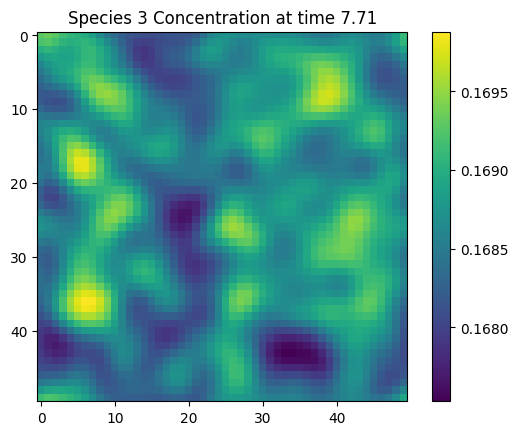

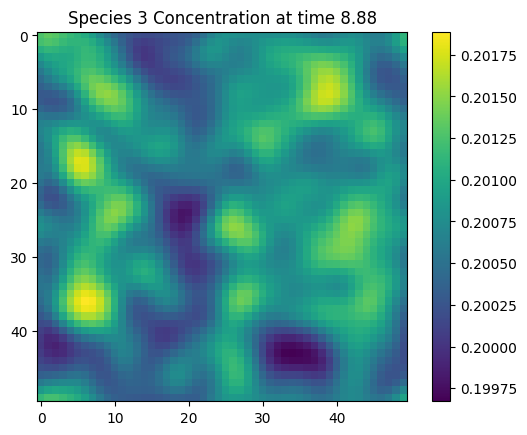

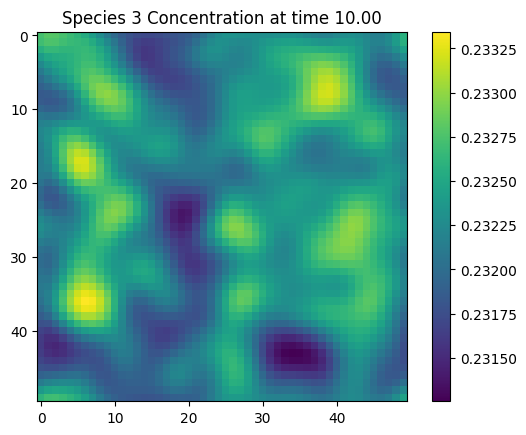

In [7]:
species_index = 3  # Index of the species to plot
for t_idx, time_point in enumerate(time_points):
    plt.imshow(concentration_history[species_index, :, :, t_idx], cmap="viridis")
    plt.title(f"Species {species_index} Concentration at time {time_point:.2f}")
    plt.colorbar()
    plt.show()